Drawing bezier curves in pillow

https://stackoverflow.com/questions/246525/how-can-i-draw-a-bezier-curve-using-pythons-pil

{'start': {'x': 0.5, 'y': 0}, 'control1': {'x': 0.25, 'y': 0.25}, 'control2': {'x': 0.25, 'y': 0.5}, 'end': {'x': 0, 'y': 1}}
{'start': {'x': 0.5, 'y': 0}, 'control1': {'x': 0.75, 'y': 0.25}, 'control2': {'x': 0.75, 'y': 0.5}, 'end': {'x': 1, 'y': 1}}
{'start': {'x': 0.2, 'y': 0.5}, 'control1': {'x': 0.25, 'y': 0.5}, 'control2': {'x': 0.75, 'y': 0.5}, 'end': {'x': 0.8, 'y': 0.5}}


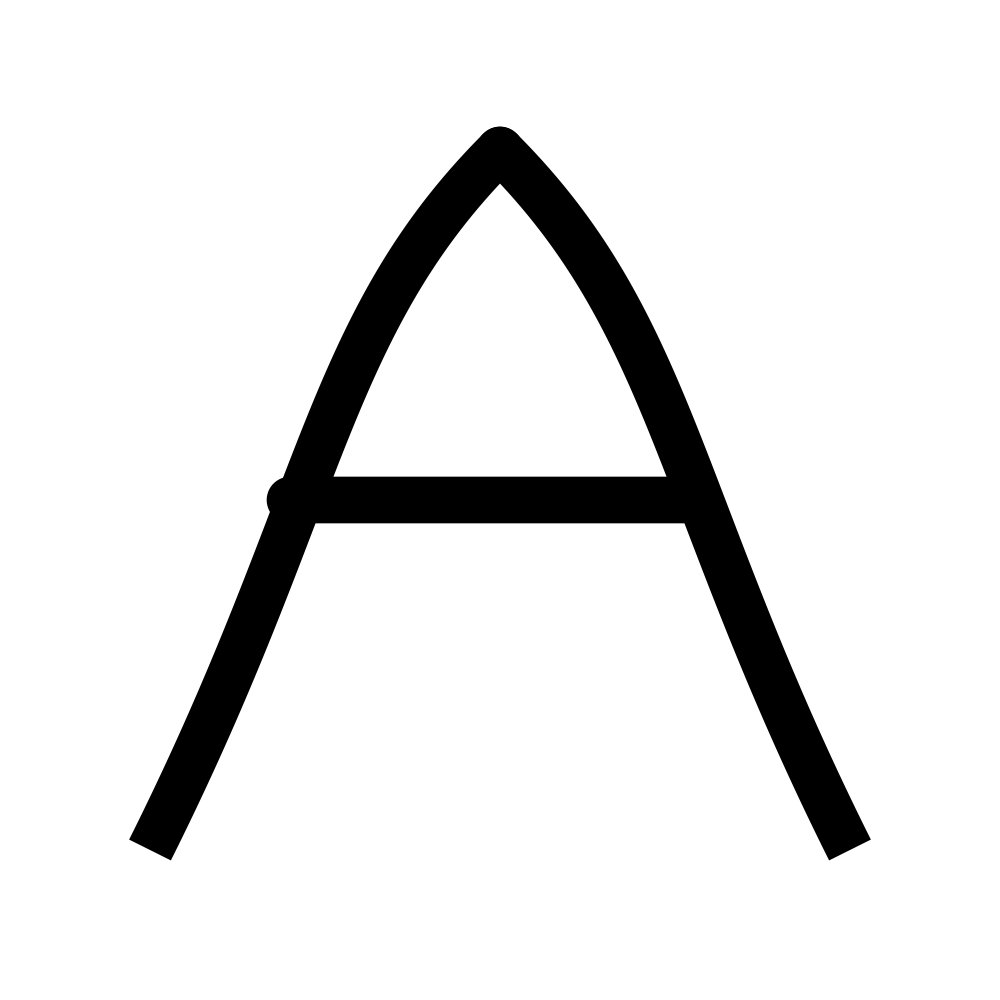

In [73]:
# imports
from PIL import Image
import aggdraw
import json

alphabets = json.load(open("./src/static/alphabets.json"))

A = alphabets["A"]

    # print(A[i])
# setup
canvas_edge = 1000
img = Image.new("RGBA", (canvas_edge,canvas_edge), "#fff") # last part is image dimensions
draw = aggdraw.Draw(img)

char_edge = edge_length * 0.7

offset = (canvas_edge - char_edge) / 2

stroke_width = char_edge / 15
radius = stroke_width / 2

pen = aggdraw.Pen("black", stroke_width)
for i in range(len(A)):
    path = aggdraw.Path()
    vals = A[i]

    start_point = (vals["start"]["x"] * char_edge, vals["start"]["y"] * char_edge)
    
    control_point1 = (vals["control1"]["x"] * char_edge, vals["control1"]["y"] * char_edge)
    control_point2 = (vals["control2"]["x"] * char_edge, vals["control2"]["y"] * char_edge)
    end_point = (vals["end"]["x"] * char_edge, vals["end"]["y"] * char_edge)
    
    start_point = (start_point[0] + offset, start_point[1] + offset)
    control_point1 = (control_point1[0] + offset, control_point1[1] + offset)
    control_point2 = (control_point2[0] + offset, control_point2[1] + offset)
    end_point = (end_point[0] + offset, end_point[1] + offset)

    s_left = start_point[0] - radius
    s_top = start_point[1] - radius
    s_right = start_point[0] + radius
    s_bottom = start_point[1] + radius
    draw.ellipse((s_left, s_top, s_right, s_bottom), aggdraw.Pen(0, 0), aggdraw.Brush("black"))

    e_left = end_point[0] - radius
    e_top = end_point[1] - radius
    e_right = end_point[0] + radius
    e_bottom = end_point[1] + radius
    draw.ellipse((e_left, e_top, e_right, e_bottom), aggdraw.Pen(0, 0), aggdraw.Brush("black"))

    
    path.moveto(*start_point)
    path.curveto(*control_point1, *control_point2, *end_point)

    # draw the path
    # draw.parametric(path, pen)
    draw.path(path, pen)

    print(A[i])

# path.moveto(0,0)
# path.curveto(*control_point1, *control_point2, *end_point)
# path.close()


img.save("testbeziercurves.png") # this image gets saved to same folder as the script
draw.flush()


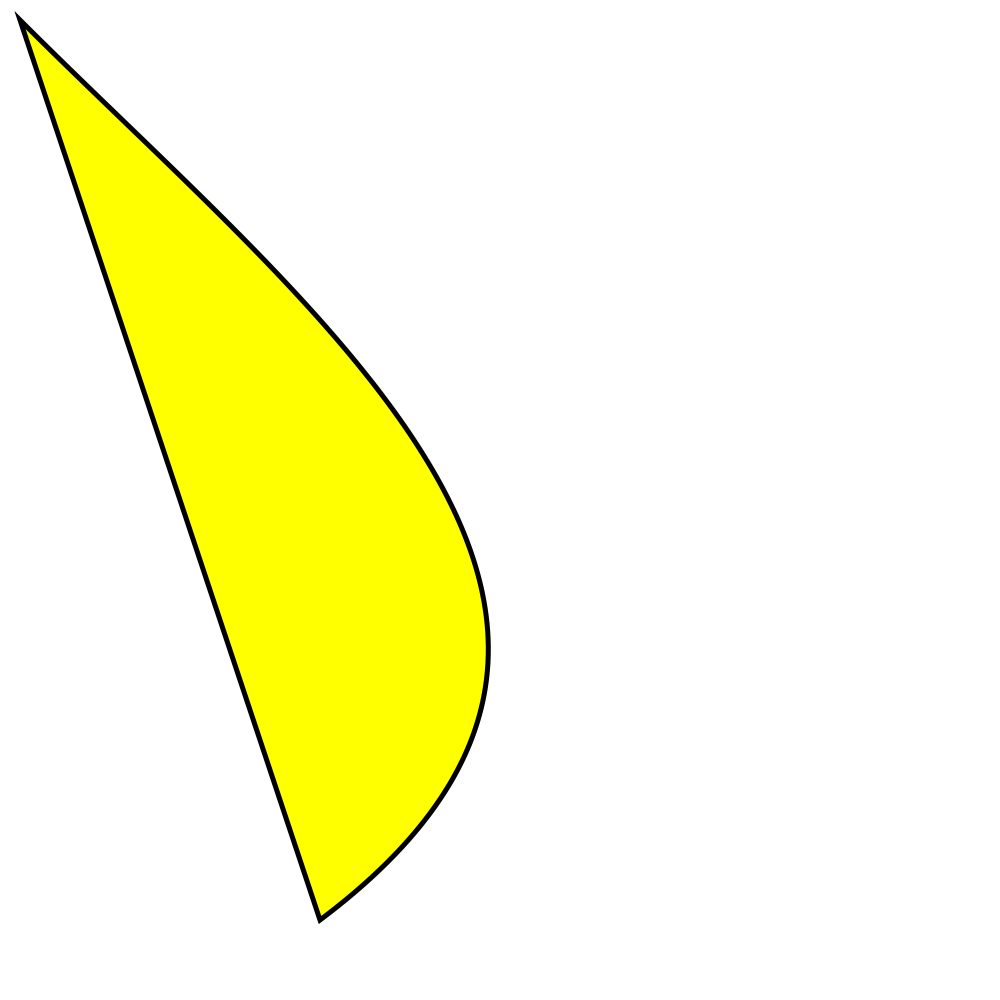

In [61]:
# imports
from PIL import Image
import aggdraw

# setup
img = Image.new("RGBA", (1000,1000)) # last part is image dimensions
draw = aggdraw.Draw(img)
outline = aggdraw.Pen("black", 5) # 5 is the outlinewidth in pixels
fill = aggdraw.Brush("yellow")

# the pathstring:
#m for starting point
#c for bezier curves
#z for closing up the path, optional
#(all lowercase letters for relative path)
pathstring = " m0,0 c300,300,700,600,300,900 z"

# create symbol
symbol = aggdraw.Symbol(pathstring)

# draw and save it
xy = (20,20) # xy position to place symbol
draw.symbol(xy, symbol, outline, fill)
draw.flush()
# img.save("testbeziercurves.png") # this image gets saved to same folder as the script


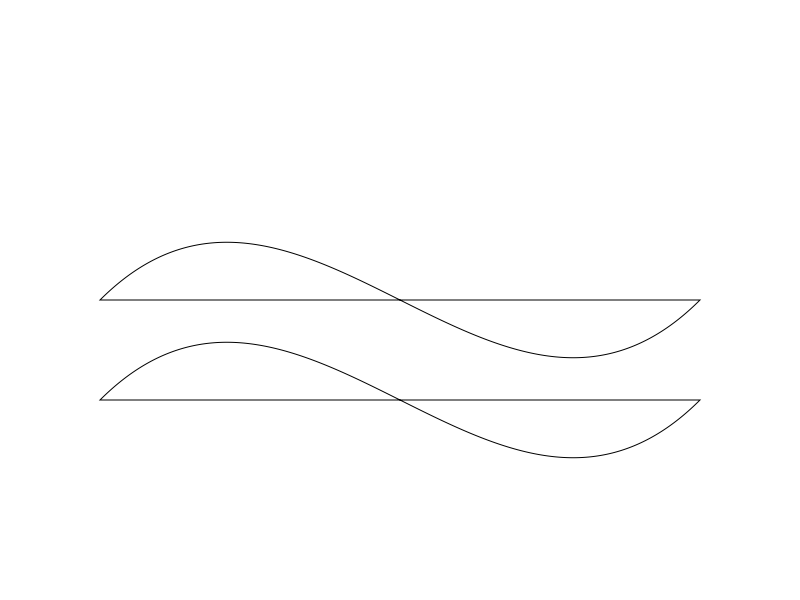

In [52]:
import aggdraw
from PIL import Image

# Create a new image
image_width = 800
image_height = 600
background_color = (255, 255, 255)  # White color
image = Image.new('RGB', (image_width, image_height), background_color)

# Create a draw object for the image
draw = aggdraw.Draw(image)

# Define the color for the Bézier curves
curve_color = (0, 0, 0)  # Black color

# Create a list of cubic Bézier curves, each represented by a list of control points
cubic_curves = [
    [(100, 300), (300, 100), (500, 500), (700, 300)],
    [(100, 400), (300, 200), (500, 600), (700, 400)],
    # Add more curves as needed
]

# Create a pen with the specified color and width
pen = aggdraw.Pen(curve_color)

# Draw each cubic Bézier curve
for curve_points in cubic_curves:
    path = aggdraw.Path()
    path.moveto(*curve_points[0])
    path.curveto(*curve_points[1], *curve_points[2], *curve_points[3])
    path.close()
    draw.path(path, pen)

# Save or display the image
image.save('multiple_bezier_curves.png')

# Close the draw object
draw.flush()